# Model Building and Evaluation

## Importing the Necessary Libraries and Loading the Dataset

In [2]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [4]:
# load preprocessed dataset
df = pd.read_csv('./deleted_mv_dataset_columns.csv')
df

,nox,rm,dis,tax,ptratio,b,medv
0,0.538,6.575,4.0900,296,15.3,396.90,24.0
1,0.469,6.421,4.9671,242,17.8,396.90,21.6
2,0.469,7.185,4.9671,242,17.8,392.83,34.7
3,0.458,6.998,6.0622,222,18.7,394.63,33.4
4,0.458,7.147,6.0622,222,18.7,396.90,36.2
...,...,...,...,...,...,...,...
501,0.573,6.593,2.4786,273,21.0,391.99,22.4
502,0.573,6.120,2.2875,273,21.0,396.90,20.6
503,0.573,6.976,2.1675,273,21.0,396.90,23.9
504,0.573,6.794,2.3889,273,21.0,393.45,22.0


## Getting the Variables and Spliting the Data

Here, we get the independent(X) and dependent(y) features/variables for the 3 split dataset - `train`, `validation`, and `test`. Test size will be set to 20% while 80% will be for the train (this will be further split to get a `train` and `validation` dataset). 'random state' is added to make the split reproducible irrespective of the hardware it is run on.

In [5]:
# split the dataset
# test size:- 20%
# train size:- 80%

np.random.seed(0)
df_full_train, df_test = train_test_split(df, test_size=0.25, random_state=1)

In [6]:
len(df_full_train), len(df_test)

(379, 127)

### Getting the Independent(X) and Dependent(y) Variables for the Test Dataset

Here we get the dependent and indepepndent variable for the test dataset. Before that we want to reset the index. We don't have to but it's nicer to do.

In [7]:
# reset index because it was shuffled on split
df_test = df_test.reset_index(drop=True)
df_test

,nox,rm,dis,tax,ptratio,b,medv
0,0.472,6.849,3.1827,222,18.4,396.90,28.2
1,0.484,6.696,5.7321,370,17.6,396.90,23.9
2,0.448,6.030,5.6894,233,17.9,392.74,16.6
3,0.409,5.878,6.4980,345,18.9,396.21,22.0
4,0.770,5.362,2.1036,666,20.2,380.79,20.8
...,...,...,...,...,...,...,...
122,0.448,6.770,5.7209,233,17.9,385.41,26.6
123,0.770,6.251,2.2955,666,20.2,350.65,19.9
124,0.405,6.565,7.3172,293,16.6,371.72,24.8
125,0.585,6.019,2.4091,391,19.2,396.90,21.2


In [8]:

# get the independent(X) variable for the test dataset
X_test = df_test.iloc[:, :-1]
X_test

,nox,rm,dis,tax,ptratio,b
0,0.472,6.849,3.1827,222,18.4,396.90
1,0.484,6.696,5.7321,370,17.6,396.90
2,0.448,6.030,5.6894,233,17.9,392.74
3,0.409,5.878,6.4980,345,18.9,396.21
4,0.770,5.362,2.1036,666,20.2,380.79
...,...,...,...,...,...,...
122,0.448,6.770,5.7209,233,17.9,385.41
123,0.770,6.251,2.2955,666,20.2,350.65
124,0.405,6.565,7.3172,293,16.6,371.72
125,0.585,6.019,2.4091,391,19.2,396.90


In [9]:
# getting the dependent(y) variable for test dataset

y_test = df_test.iloc[:, -1]
y_test

0      28.2
1      23.9
2      16.6
3      22.0
4      20.8
       ... 
122    26.6
123    19.9
124    24.8
125    21.2
126    23.9
Name: medv, Length: 127, dtype: float64

### Getting the Validation Dataset from the Train Dataset and the Variables for Train and Validation Dataset

We want to take the train dataset (which is df_full_train) and split it further into 60% and 20%. We want to get 20% of the df_full_train to assign to validation dataset. To achieve that, we need to know how much is 20% out of 80%, which is, $\frac{20}{80} = \frac{1}{4} = 0.25$. Before we proceed to get the split, we need the get the X and y.

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size=0.4, random_state=1)

In [11]:
len(df_test), len(df_train), len(df_val), len(df_train) + len(df_val)

(127, 227, 152, 379)

In [12]:
# reset index for df_train because it was shuffled on split
df_train = df_train.reset_index(drop=True)
df_train

,nox,rm,dis,tax,ptratio,b,medv
0,0.4130,5.961,5.2873,305,19.2,376.94,21.7
1,0.4379,6.031,6.6407,304,16.9,362.25,19.4
2,0.4310,6.438,7.3967,330,19.1,377.07,24.8
3,0.7130,6.701,2.5975,666,20.2,255.23,16.4
4,0.6710,6.223,1.3861,666,20.2,393.74,10.2
...,...,...,...,...,...,...,...
222,0.7400,6.406,2.0651,666,20.2,385.96,17.1
223,0.5380,5.570,3.7979,307,21.0,376.57,13.6
224,0.6680,5.875,1.1296,666,20.2,347.88,50.0
225,0.4530,5.741,7.2254,284,19.7,395.11,18.7


In [13]:
# get the independent(X) variable for the train dataset
X_train = df_train.iloc[:, :-1]
X_train

,nox,rm,dis,tax,ptratio,b
0,0.4130,5.961,5.2873,305,19.2,376.94
1,0.4379,6.031,6.6407,304,16.9,362.25
2,0.4310,6.438,7.3967,330,19.1,377.07
3,0.7130,6.701,2.5975,666,20.2,255.23
4,0.6710,6.223,1.3861,666,20.2,393.74
...,...,...,...,...,...,...
222,0.7400,6.406,2.0651,666,20.2,385.96
223,0.5380,5.570,3.7979,307,21.0,376.57
224,0.6680,5.875,1.1296,666,20.2,347.88
225,0.4530,5.741,7.2254,284,19.7,395.11


In [14]:
# getting the dependent(y) variable for train dataset

y_train = df_train.iloc[:, -1]
y_train

0      21.7
1      19.4
2      24.8
3      16.4
4      10.2
       ... 
222    17.1
223    13.6
224    50.0
225    18.7
226    20.8
Name: medv, Length: 227, dtype: float64

In [15]:
# reset index for the validation dataset because it was shuffled on split
df_val = df_val.reset_index(drop=True)
df_val

,nox,rm,dis,tax,ptratio,b,medv
0,0.597,6.852,1.4655,666,20.2,179.36,27.5
1,0.770,6.395,2.5052,666,20.2,391.34,21.7
2,0.624,5.857,1.6686,437,21.2,392.04,13.3
3,0.544,6.635,3.3175,304,18.4,396.90,22.8
4,0.447,6.826,4.8628,254,17.6,393.45,33.1
...,...,...,...,...,...,...,...
147,0.693,6.343,1.5741,666,20.2,396.90,7.2
148,0.448,5.399,5.8700,233,17.9,396.90,14.4
149,0.538,5.713,4.2330,307,21.0,360.17,12.7
150,0.679,5.957,1.8026,666,20.2,16.45,8.8


In [16]:
# get the independent(X) variable for the validation dataset
X_val = df_val.iloc[:, :-1]
X_val

,nox,rm,dis,tax,ptratio,b
0,0.597,6.852,1.4655,666,20.2,179.36
1,0.770,6.395,2.5052,666,20.2,391.34
2,0.624,5.857,1.6686,437,21.2,392.04
3,0.544,6.635,3.3175,304,18.4,396.90
4,0.447,6.826,4.8628,254,17.6,393.45
...,...,...,...,...,...,...
147,0.693,6.343,1.5741,666,20.2,396.90
148,0.448,5.399,5.8700,233,17.9,396.90
149,0.538,5.713,4.2330,307,21.0,360.17
150,0.679,5.957,1.8026,666,20.2,16.45


In [18]:
# getting the dependent(y) variable for train dataset

y_val = df_val.iloc[:, -1]
y_val

0      27.5
1      21.7
2      13.3
3      22.8
4      33.1
       ... 
147     7.2
148    14.4
149    12.7
150     8.8
151    13.8
Name: medv, Length: 152, dtype: float64

#### Variable Summary

- X_train
- y_train
- X_val
- y_val
- X_test
- y_test

## Standardizing the Dataset
We need to standardize our features X because they are calculated to different units and need to be brought to the same scale. Internally, gradient descent is used. The aim is to come to a global minimum, which is achieved through making all our independent(X) unit be in the same scale. This is done using the StandardScaler from sklearn

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
# X_val = scaler.fit_transform(X_val)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Building

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [22]:
# train the model(train)

model.fit(X_train, y_train)

LinearRegression()

In [23]:
## print the coefficients and the intercepts for independent features
model.coef_

array([-2.72965656,  3.94926335, -1.65390254, -0.56793009, -2.19301401,
        1.17340661])

In [24]:
model.intercept_

21.98810572687225

### Interpreting the Coefficient and Intercept

From the result gotten from the cell for coefficient, it can be observed that with the increase in the `nox` value, there will be `-3.59432979` decrease in price(`medv`) value and so on for the rest of the features/columns.

From the result gotten from the cell for intercept, it can be observed that .....

In [25]:
## on which parameters has the model been trained

model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
## predict with the validation dataset

model_val_pred = model.predict(X_val)
model_val_pred

# the result are our prediction

array([21.59228157, 16.78961397, 17.42333375, 26.13386576, 29.3115524 ,
       14.61191473, 36.24744437, 27.90499453, 24.64571088, 22.5313725 ,
       23.34646478, 16.46171716, 18.12477902, 21.15017608, 25.5952401 ,
       32.45778506, 25.86489886, 11.44899017, 24.0419412 , 30.0955569 ,
       33.02234116, 11.16630525, 10.16875961, 15.1062195 , 17.85534023,
       29.50569171, 24.46445722, 22.42687881, 14.9539595 , 19.79925131,
       21.60252821, 19.39478976, 20.85587473, 24.81342293, 19.74521741,
       32.97655912, 23.36739786, 16.53161106, 17.80977732, 29.99323138,
       28.4728091 , 29.97378138, 25.28884857, 19.99592621, 22.4517794 ,
       21.92246428, 32.7804042 , 27.06358836, 35.51980938, 32.35718022,
       21.01208242, 23.69505289, 23.83008546, 36.65025586, 20.95529597,
       16.37204731, 24.52020233, 29.47468838,  4.36956629, 19.47713994,
       39.12111613, 36.8011809 , 25.62117727, 16.56924736, 23.5858917 ,
       13.21142105, 15.22512022, 15.02483676, 18.92583383, 20.64

In [27]:
## predict with the test dataset

model_test_pred = model.predict(X_test)
model_test_pred

# the result are our prediction

array([29.45985234, 26.64986342, 23.71518348, 21.67594649, 10.94236446,
       19.82326407, 27.12471649, 19.16640005, 24.64022327, 27.05069988,
       23.8400243 , 26.98926505, 21.39787191, 24.43873863, 22.93864449,
       15.00956811, 21.15852827, 40.50897896, 27.96478741, 13.60972647,
       20.20159391, 14.75511113, 25.49490839, 23.66990713, 27.37419569,
       11.48276628, 17.95805424, 20.43604943, 35.78408308, 13.26550723,
       22.48331203, 18.14283986, 40.14826984, 16.8639869 , 24.08500378,
       20.60170992, 16.5678396 , 28.91008498,  7.01422141, 18.75035008,
       25.79840994, 20.60686078, 28.03659826, 18.89640941, 19.35688022,
       16.6034173 , 36.17866087, 16.2881226 , 24.10577902, 18.55130388,
       23.64284928, 25.98212522, 24.68941366, 26.26775549, 12.53875074,
       22.76213132, 15.54003014, 23.67815434, 18.75293562, 37.00689808,
       17.67418318, 27.47360815, 15.53959178, 17.23752775, 19.32108545,
       30.8862164 , 37.47489618, 26.1250039 , 25.9651649 , 24.57

We have predictions from both the test and val datasets. We need to compare it against our y_test and y_val since they hold the true value for price data. This tells us how well our model is performing.

Text(0, 0.5, 'model_val_pred')

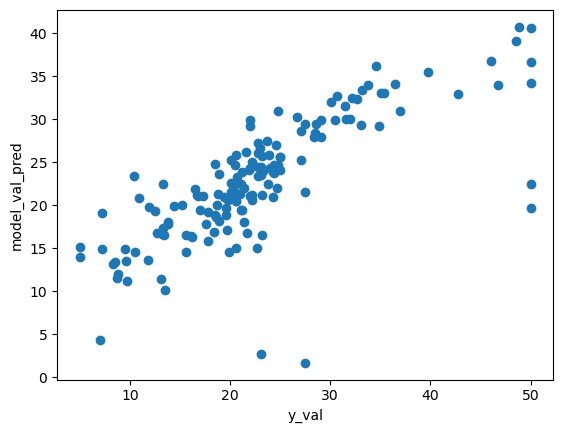

In [28]:
## checking to see how our model is working

# model_val_pred = model.predict(X_val)[:, 1]
# pred_val = (model_val_pred >= 0.5)
# (y_val == pred_val).mean() 

plt.scatter(y_val, model_val_pred)
plt.xlabel("y_val")
plt.ylabel("model_val_pred")

Text(0, 0.5, 'model_test_pred')

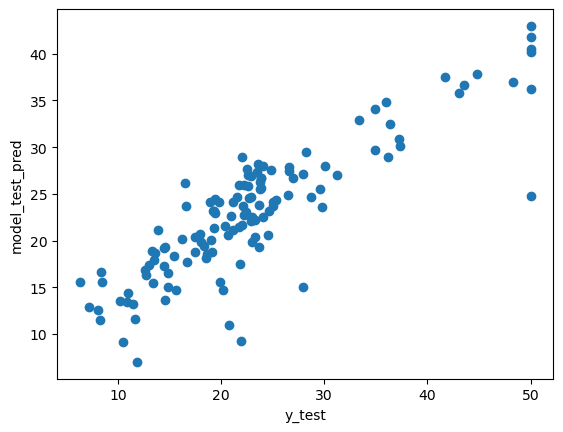

In [29]:
plt.scatter(y_test, model_test_pred)
plt.xlabel("y_test")
plt.ylabel("model_test_pred")

It is observed from the preceeding cells that our model is performing ok since we have a linear relationship between the prediction and the price value

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Errors')

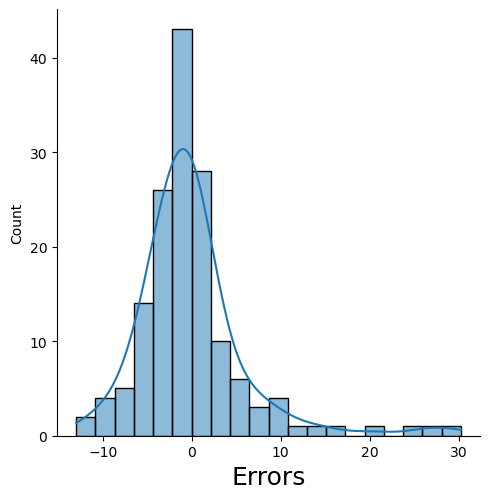

In [43]:
# residuals for validation dataset, i.e, errors
val_residuals = y_val - model_val_pred

# plot the residuals for val dataset
sns.displot(val_residuals, bins = 20, kde = True)                  
plt.xlabel('Errors', fontsize = 18)

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Errors')

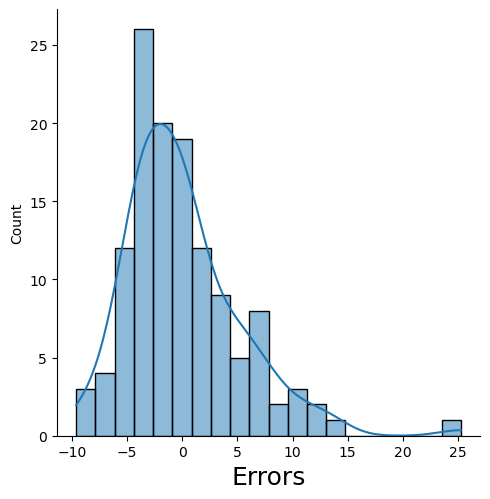

In [42]:
# residuals for test dataset, i.e, errors
test_residuals = y_test - model_test_pred

# plot the residuals for test data
sns.displot(test_residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 18)

We see from the graphs that we have a normal distribution for both the validation and test dataset with some amount of outliers in our `test_residuals`. It shows that our model is doing ok.

## Model Evaluation

It is important to use other performance metrics to really see how our model is doing. For the evaluation metrics using the sklearn library, we will use:

- mean_squared_error
- mean_absolute_error
- R square
- adjusted_r_square

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("val data")
print(mean_absolute_error(y_val, model_val_pred))
print(mean_squared_error(y_val, model_val_pred))
print(np.sqrt(mean_squared_error(y_val, model_val_pred)))
print("")


print("test data")
print(mean_absolute_error(y_test, model_test_pred))
print(mean_squared_error(y_test, model_test_pred))
print(np.sqrt(mean_squared_error(y_test, model_test_pred)))

val data
3.96416846736549
38.830615957407055
6.231421664227759

test data
3.8439963024335695
26.887996557258163
5.185363686112881


Describe the result from the preceeding cell

### R Square

$R^2 = 1 - SSR/SST$

where $R^2$ = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [45]:
from sklearn.metrics import r2_score

# r2_score for the test dataset
score = r2_score(y_val, model_val_pred)
score

0.5860103997506283

In [46]:
# r2_score for the test dataset

score = r2_score(y_test, model_test_pred)
score

0.7285643964440791

### Adjusted R Square

$R^2 = 1 - [(1-R^2) * (n - 1) / (n - k - 1)]$

where $R^2$ = the R^2 of the model n = the number of observations k = the number of predictor variables

In [47]:
1 - (1 - score) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1)

0.717332578365903

In [48]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7149926162662831

The adjusted r2_score is less than the r2_score for test data which is the expected behaviour

## New Data Prediction

We want to take up a new data and predict it using our regression model to see our output. We must transform our data (i.e, standardization) before predicting

In [49]:
# to get single data point
df.values[0].shape

#  training our model made it 2 dimensions so we have to reshape to get the 2 dimension. This is how we give the model for prediction
# df.iloc[:, :-1].values[0].reshape(1, -1)
# X = df.iloc[:, :-1].values[0].reshape(1, -1)
X = df.iloc[:, :-1].values[0].reshape(1, -1)


In [50]:
# scale before predict
model.predict(scaler.transform(X))
# X_train

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([28.7579669])

In [51]:
# cross-checking the prediction

df.head(1)

,nox,rm,dis,tax,ptratio,b,medv
0,0.538,6.575,4.09,296,15.3,396.9,24.0


Pickling the Model File for Deployment

We have to pickle the regression model

In [ ]:
import pickle

In [ ]:
# dump into a file

pickle.dump(model, open("regmodel.pkl", "wb"))

In [ ]:
# load pickle file

pickled_model = pickle.load(open("regmodel.pkl", "rb"))

In [ ]:
# use the pickled file to make prediction. it can be saved on local storage or cloud

pickled_model.predict(scaler.transform(X))